In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
clients = pd.read_csv('clients.csv', sep = ';')

In [3]:
visits = pd.read_csv('visits.csv', sep = ';')
marketing = pd.read_csv('marketing.csv', sep = ';')


In [4]:
print("=== Информация о данных ===")
print(clients.info())
print(visits.info())
print(marketing.info())


=== Информация о данных ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   client_id          10 non-null     int64 
 1   name               10 non-null     object
 2   join_date          10 non-null     object
 3   subscription_type  10 non-null     object
 4   price              10 non-null     int64 
 5   trainer_assigned   10 non-null     object
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   visit_id       10 non-null     int64 
 1   client_id      10 non-null     int64 
 2   date           10 non-null     object
 3   training_type  10 non-null     object
 4   duration_min   10 non-null     int64 
dtypes: int64(3), object(2)
memor

In [5]:
clients['join_date'] = pd.to_datetime(clients['join_date'], dayfirst=True)
visits['date'] = pd.to_datetime(visits['date'], dayfirst=True)

In [6]:
merge_data = pd.merge(clients, visits, on = 'client_id', how = 'inner')

In [7]:
print(merge_data)

   client_id          name  join_date subscription_type  price  \
0          1     Иванов И. 2025-01-10         Групповой   3000   
1          1     Иванов И. 2025-01-10         Групповой   3000   
2          1     Иванов И. 2025-01-10         Групповой   3000   
3          2    Петрова А. 2025-02-15               VIP   8000   
4          4  Михайлова О. 2025-01-05         Групповой   3000   
5          5   Кузнецов П. 2025-09-10    Индивидуальный   6000   
6          6   Смирнова Е. 2025-07-12         Групповой   3000   
7          7     Волков А. 2025-08-20               VIP   8000   
8          7     Волков А. 2025-08-20               VIP   8000   
9         10   Федорова Н. 2025-05-03         Групповой   3000   

  trainer_assigned  visit_id       date   training_type  duration_min  
0               Да         1 2025-09-11          Кардио            45  
1               Да         2 2025-09-12       Групповая            60  
2               Да         7 2025-09-15          Кардио  

In [8]:
print("\n=== Топ-3 самых популярных типов абонементов ===")
print(merge_data['subscription_type'].value_counts())


=== Топ-3 самых популярных типов абонементов ===
subscription_type
Групповой         6
VIP               3
Индивидуальный    1
Name: count, dtype: int64


In [9]:
print("\n=== Общее количество посещений по типу абонемента ===")
visits_by_subscription = merge_data.groupby('subscription_type')['visit_id'].count()
print(visits_by_subscription)


=== Общее количество посещений по типу абонемента ===
subscription_type
VIP               3
Групповой         6
Индивидуальный    1
Name: visit_id, dtype: int64


In [10]:
print("\n=== Подсчёт суммарной выручки по каждому типу абонемента ===")
revenue = clients.groupby('subscription_type')['price'].sum().sort_values(ascending=False)
print("Выручка по типам абонементов:")
print(revenue)


=== Подсчёт суммарной выручки по каждому типу абонемента ===
Выручка по типам абонементов:
subscription_type
VIP               16000
Групповой         12000
Индивидуальный    12000
Разовый            1000
Name: price, dtype: int64


In [11]:
print("\n=== Самая ээфективная кампания ===")
most_clients = marketing.loc[marketing['new_clients'].idxmax()]
print(f"Кампания '{most_clients['type']}' привлекла больше всего клиентов: {most_clients['new_clients']}")


=== Самая ээфективная кампания ===
Кампания 'Новогодняя акция' привлекла больше всего клиентов: 120


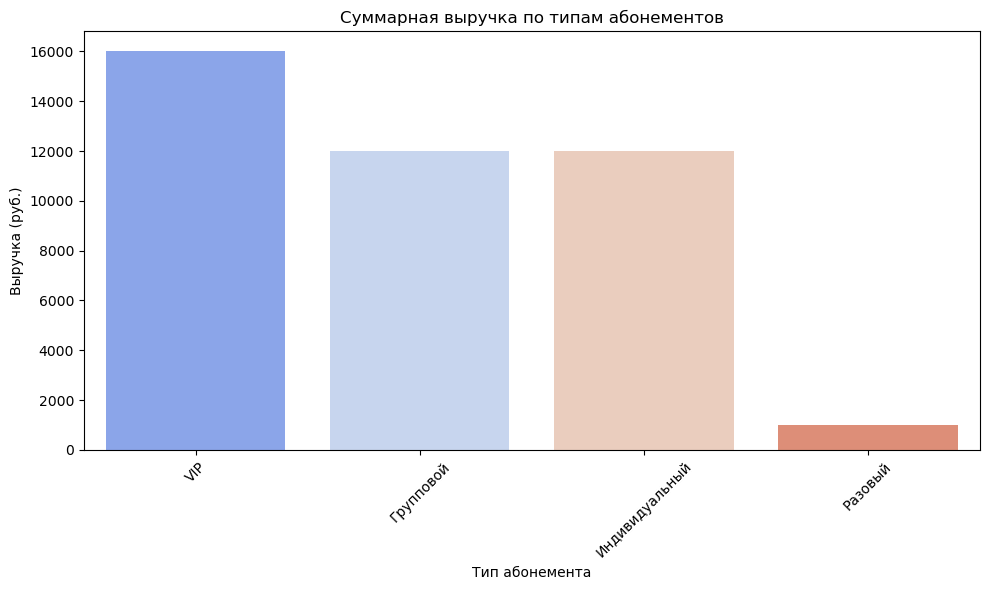

In [12]:
#Суммарная выручка по типам абонементов
plt.figure(figsize=(10,6))
sns.barplot(x=revenue.index, y=revenue.values, hue = revenue.index, legend = False, palette="coolwarm")
plt.title('Суммарная выручка по типам абонементов')
plt.xlabel('Тип абонемента')
plt.ylabel('Выручка (руб.)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

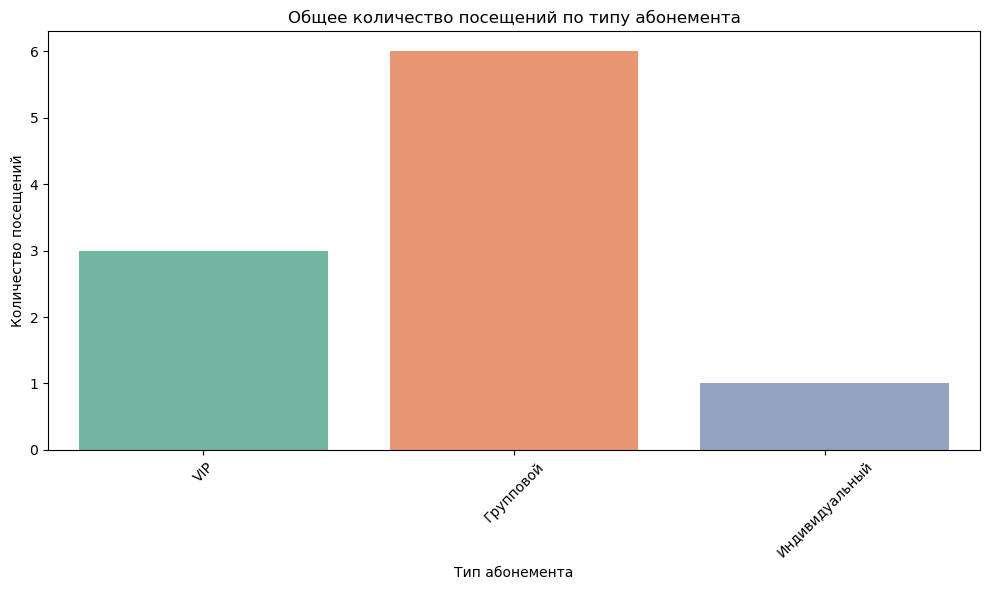

In [13]:
# Количество посещений для каждого типа абонемента
plt.figure(figsize=(10,6))
sns.barplot(x=visits_by_subscription.index, y=visits_by_subscription.values, hue = visits_by_subscription.index, legend = False, palette="Set2")
plt.title('Общее количество посещений по типу абонемента')
plt.xlabel('Тип абонемента')
plt.ylabel('Количество посещений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

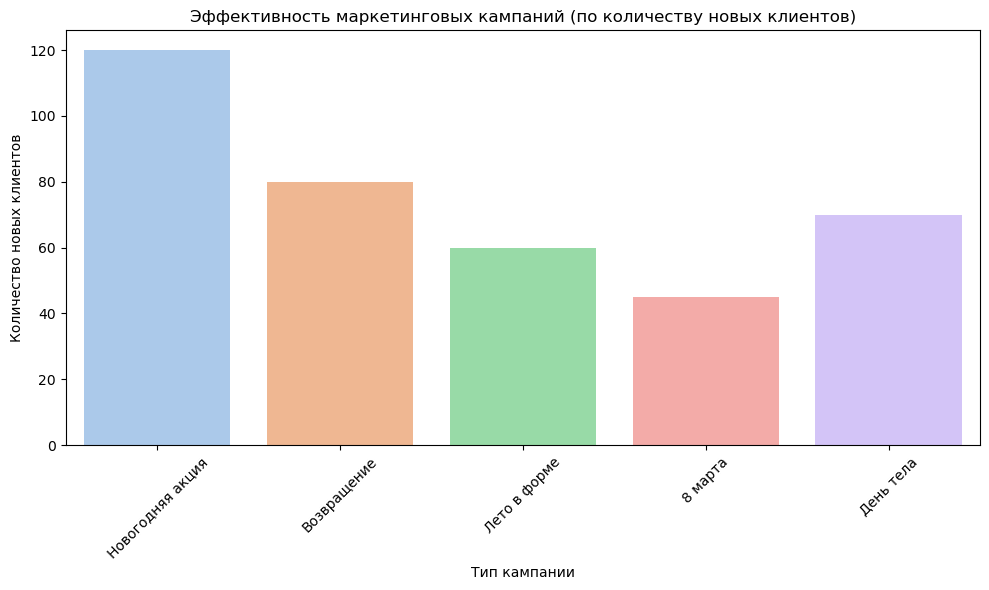

In [14]:
# Самая эффективная кампания
plt.figure(figsize=(10,6))
sns.barplot(x=marketing['type'], y=marketing['new_clients'], hue = marketing['type'], legend = False, palette="pastel")
plt.title('Эффективность маркетинговых кампаний (по количеству новых клиентов)')
plt.xlabel('Тип кампании')
plt.ylabel('Количество новых клиентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---  РАБОТА С POSTGRESQL ---

In [15]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [16]:
from dotenv import load_dotenv
import os
import psycopg2
from sqlalchemy import create_engine


In [17]:
load_dotenv()

True

In [18]:
DB_HOST = os.getenv('DB_HOST')
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')

In [19]:
conn_str = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}'
engine = create_engine(conn_str)

In [20]:
clients.to_sql('clients', engine, if_exists='replace', index=False)
visits.to_sql('visits', engine, if_exists='replace', index=False)
marketing.to_sql('marketing', engine, if_exists='replace', index=False)
print("Данные успешно загружены в PostgreSQL!")


Данные успешно загружены в PostgreSQL!


In [21]:
conn = psycopg2.connect(
    host=DB_HOST,
    database=DB_NAME,
    user=DB_USER,
    password=DB_PASSWORD
)
cur = conn.cursor()

In [22]:
# Суммарная выручка по типам абонементов
query1 = """
SELECT subscription_type, SUM(price) as total_revenue
FROM clients
GROUP BY subscription_type
ORDER BY total_revenue DESC;
"""
cur.execute(query1)
results1 = cur.fetchall()
print("\n--- SQL: Суммарная выручка по типам абонементов ---")
for row in results1:
    print(row)



--- SQL: Суммарная выручка по типам абонементов ---
('VIP', Decimal('16000'))
('Индивидуальный', Decimal('12000'))
('Групповой', Decimal('12000'))
('Разовый', Decimal('1000'))


In [23]:
# Количество посещений по типу абонемента
query2 = """
SELECT c.subscription_type, COUNT(v.visit_id) as total_visits
FROM clients c
JOIN visits v ON c.client_id = v.client_id
GROUP BY c.subscription_type
ORDER BY total_visits DESC;
"""
cur.execute(query2)
results2 = cur.fetchall()
print("\n--- SQL: Количество посещений по типу абонемента ---")
for row in results2:
    print(row)



--- SQL: Количество посещений по типу абонемента ---
('Групповой', 6)
('VIP', 3)
('Индивидуальный', 1)


In [24]:
# Наиболее эффективная маркетинговая кампания
query3 = """
SELECT type, new_clients
FROM marketing
ORDER BY new_clients DESC
LIMIT 1;
"""
cur.execute(query3)
results3 = cur.fetchall()
print("\n--- SQL: Самая эффективная кампания (по количеству клиентов) ---")
for row in results3:
    print(row)


--- SQL: Самая эффективная кампания (по количеству клиентов) ---
('Новогодняя акция', 120)


In [25]:
cur.close()
conn.close()

print("\n--- Работа с PostgreSQL завершена ---")


--- Работа с PostgreSQL завершена ---


In [26]:
print("="*50)
print("           ИТОГОВЫЙ ОТЧЁТ ПРОЕКТА")
print("="*50)

print("\n1. Популярность абонементов:")
print("- Групповые абонементы являются самыми популярными (6 клиентов).")
print("- VIP-абонементы занимают второе место (3 клиента).")

print("\n2. Доходность абонементов:")
print("- VIP-абонементы приносят наибольшую выручку (16000 руб.).")
print("- За ними следуют Групповые и Индивидуальные (по 12000 руб.).")

print("\n3. Эффективность маркетинга:")
print("- Кампания 'Новогодняя акция' привлекла больше всего новых клиентов (120).")

print("\n4. Рекомендации:")
print("- Увеличить количество VIP-тренировок и персонализированных услуг.")
print("- Развивать программы для удержания клиентов с Групповыми абонементами.")

print("="*50)

           ИТОГОВЫЙ ОТЧЁТ ПРОЕКТА

1. Популярность абонементов:
- Групповые абонементы являются самыми популярными (6 клиентов).
- VIP-абонементы занимают второе место (3 клиента).

2. Доходность абонементов:
- VIP-абонементы приносят наибольшую выручку (16000 руб.).
- За ними следуют Групповые и Индивидуальные (по 12000 руб.).

3. Эффективность маркетинга:
- Кампания 'Новогодняя акция' привлекла больше всего новых клиентов (120).

4. Рекомендации:
- Увеличить количество VIP-тренировок и персонализированных услуг.
- Развивать программы для удержания клиентов с Групповыми абонементами.
